In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
# Load data
df = pd.read_csv('C:/Users/HP/Downloads/bike_sharing_dc.csv')
df.head()

,date,month,season,hour,year,holiday,temperature,feeling_temp,humidity,winspeed,casual,registered,count,work yes or not,am or pm,Day of the week
0,2011-01-01,1,winter,0,2011,no,3.28,3.0014,81.0,0.0,3,13,16,0,am,6
1,2011-01-01,1,winter,1,2011,no,2.34,1.9982,80.0,0.0,8,32,40,0,am,6
2,2011-01-01,1,winter,2,2011,no,2.34,1.9982,80.0,0.0,5,27,32,0,am,6
3,2011-01-01,1,winter,3,2011,no,3.28,3.0014,75.0,0.0,3,10,13,0,am,6
4,2011-01-01,1,winter,4,2011,no,3.28,3.0014,75.0,0.0,0,1,1,0,am,6


In [57]:
# Data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             17379 non-null  object 
 1   month            17379 non-null  int64  
 2   season           17379 non-null  object 
 3   hour             17379 non-null  int64  
 4   year             17379 non-null  int64  
 5   holiday          17379 non-null  object 
 6   temperature      17379 non-null  float64
 7   feeling_temp     17379 non-null  float64
 8   humidity         17379 non-null  float64
 9   winspeed         17379 non-null  float64
 10  casual           17379 non-null  int64  
 11  registered       17379 non-null  int64  
 12  count            17379 non-null  int64  
 13  work yes or not  17379 non-null  int64  
 14  am or pm         17379 non-null  object 
 15  Day of the week  17379 non-null  int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 2.1+ MB


In [58]:
# Check for missing values
df.isnull().sum()

date               0
month              0
season             0
hour               0
year               0
holiday            0
temperature        0
feeling_temp       0
humidity           0
winspeed           0
casual             0
registered         0
count              0
work yes or not    0
am or pm           0
Day of the week    0
dtype: int64

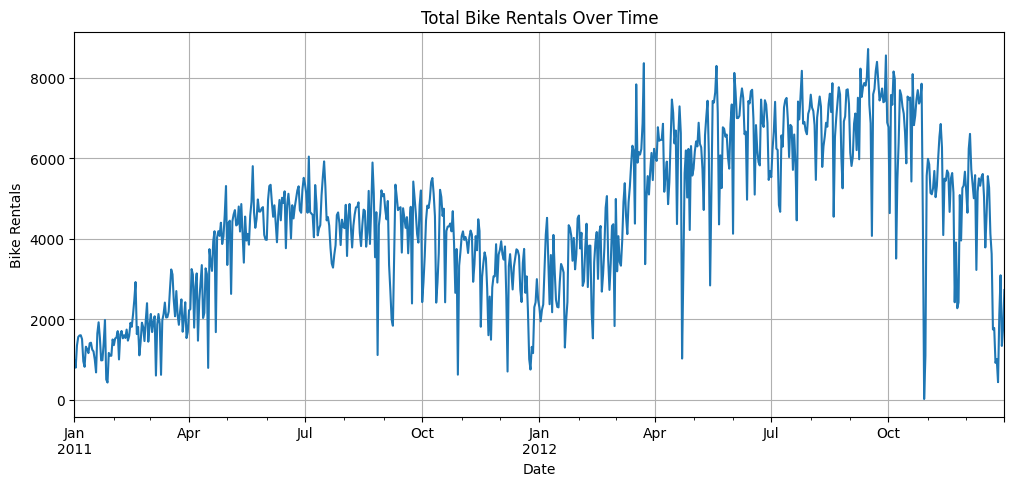

In [59]:
# Total demand over time
plt.figure(figsize=(12,5))
df['date'] = pd.to_datetime(df['date'])
df.groupby('date')['count'].sum().plot()
plt.title('Total Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Bike Rentals')
plt.grid(True)
plt.show()

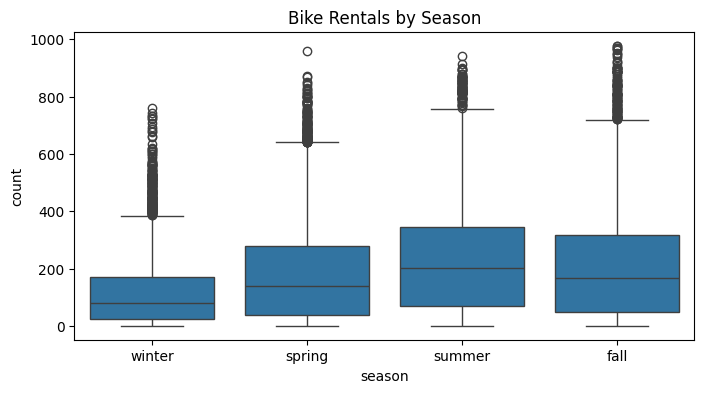

In [ ]:
# Rentals by season
plt.figure(figsize=(8,4))
sns.boxplot(x='season', y='count', data=df)
plt.title('Bike Rentals by Season')
plt.show()

In [61]:
# Feature selection and train-test split
features = ['temperature', 'humidity', 'winspeed']
target = 'count'
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 23553.842904647856
R-squared Score: 0.25616494747598406


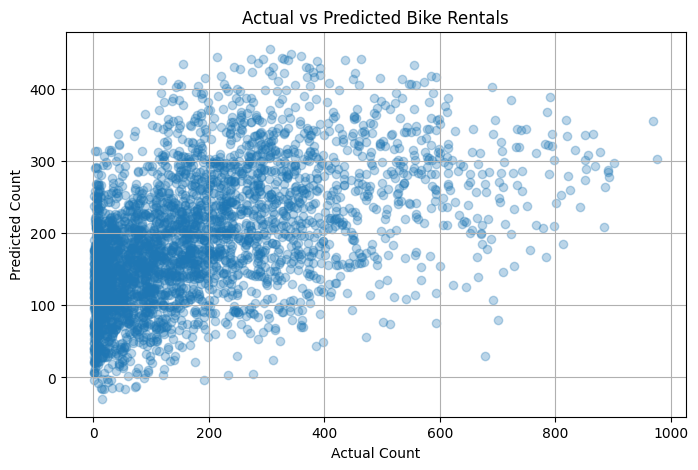

In [63]:
# Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Bike Rentals')
plt.grid(True)
plt.show()

In [64]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict with the Random Forest model
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest - Mean Squared Error:", rf_mse)
print("Random Forest - R-squared Score:", rf_r2)

Random Forest - Mean Squared Error: 26688.24968908151
Random Forest - R-squared Score: 0.15717975662754002


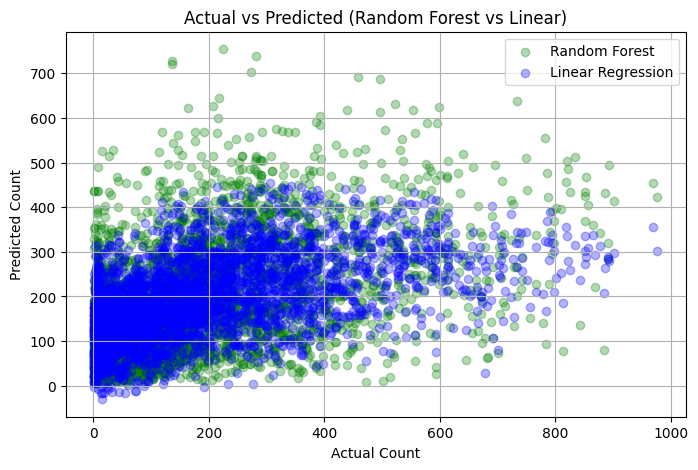

In [65]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, rf_pred, alpha=0.3, color='green', label='Random Forest')
plt.scatter(y_test, y_pred, alpha=0.3, color='blue', label='Linear Regression')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted (Random Forest vs Linear)')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create MLP model
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train_mlp, y_train_mlp)

# Predict
y_pred_mlp = mlp.predict(X_test_mlp)

# Evaluate
mlp_mse = mean_squared_error(y_test_mlp, y_pred_mlp)
mlp_r2 = r2_score(y_test_mlp, y_pred_mlp)

print("MLP Regressor - Mean Squared Error:", mlp_mse)
print("MLP Regressor - R-squared Score:", mlp_r2)

MLP Regressor - Mean Squared Error: 22177.258555963723
MLP Regressor - R-squared Score: 0.29963775552061733


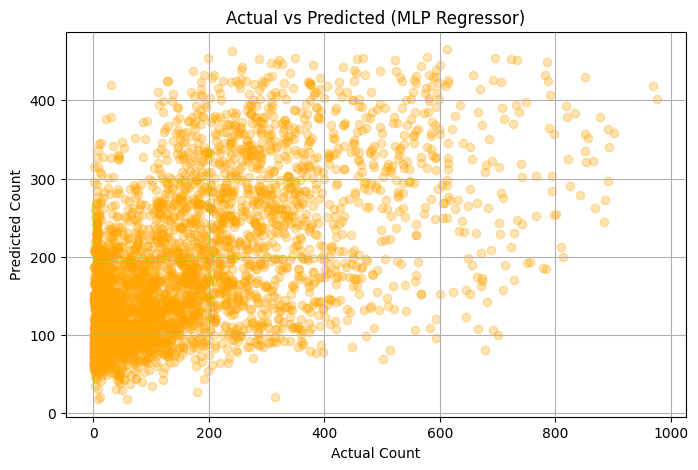

In [67]:
plt.figure(figsize=(8,5))
plt.scatter(y_test_mlp, y_pred_mlp, alpha=0.3, color='orange')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted (MLP Regressor)')
plt.grid(True)
plt.show()